In [2]:
import matplotlib.pyplot as plt
import glob
# import matplotlib
import numpy as np

# import tkinter
# matplotlib.use('TkAgg')
%matplotlib inline

#plumed sum_hills --hills HILLS

In [3]:
def openHills(fileName):
    with open(fileName) as file:
        [file.readline() for x in range(5)]
        data = np.fromfile(file, sep= " ", dtype=float)
    phi, energy, error = data.reshape(-1,3).T
    phi = (phi/np.pi)*180
    energy = energy - energy.min()
    return phi, energy, error


In [39]:
from scipy.signal import argrelextrema

filePaths = glob.glob("Plumed/HillsFiles/*")

for filePath in filePaths:
    phi, energy, error = openHills(filePath)

    # for local maxima
    MAX = argrelextrema(energy, np.greater)

    # for local minima
    MIN = argrelextrema(energy, np.less)
    print(filePath)
    print(f"{energy[MIN]}, {MIN}  ,  {energy[50:130].min()}")
    print(f"{energy[MAX]}, {MAX}   ,{energy.max()}")
    print()

Plumed/HillsFiles/Azobenzene.dat
[130.0684275  130.80910704], (array([82, 95]),)  ,  130.06842750299995
[172.92418864 133.46791952 176.42386694], (array([ 54,  89, 124]),)   ,176.42386694199996

Plumed/HillsFiles/4IOrtho.dat
[  2.02603472 119.26992959 123.05888967 123.09819257   0.        ], (array([  4,  79,  97, 101, 174]),)  ,  119.26992959300003
[  3.52806189 141.22955533 124.55764162 123.13345839 146.49189003], (array([  1,  52,  89, 100, 126]),)   ,146.49189003100003



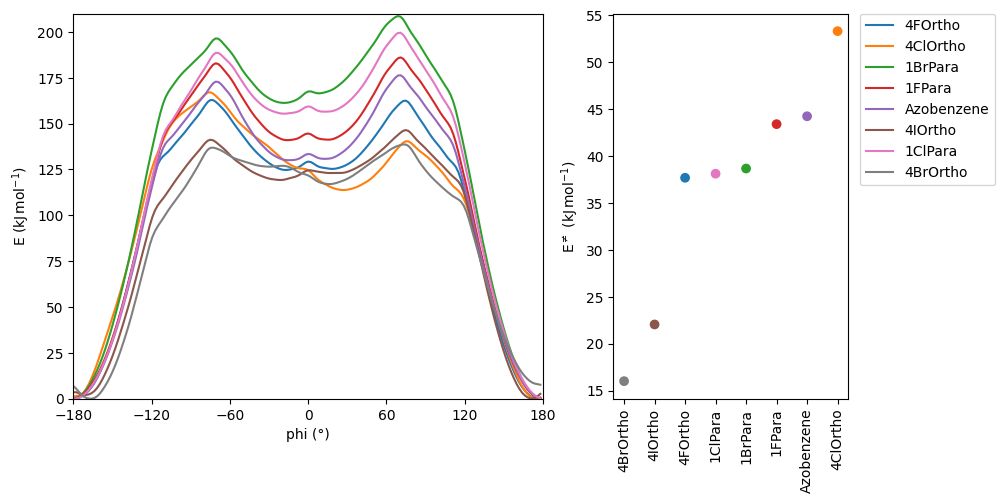

In [266]:
filePaths = glob.glob("Plumed/HillsFiles/*")

fig, ax= plt.subplots(1,2, width_ratios=[2, 1])
fig.set_size_inches(10, 5)
ax1, ax2 = ax
ax1.set_xlim(-180, 180)
ax1.set_ylim(0, 210)
ax1.set_xticks([x for x in range(-180, 181, 60)])
tsEnergys = [] 
artists = []
for filePath in filePaths:
    phi, energy, error = openHills(filePath)
    art, = ax1.plot(phi, energy, label = filePath.split("/")[-1].removesuffix(".dat"))
    
    maxEnergys = energy[np.array(argrelextrema(energy, np.greater)[0])]
    MAX = maxEnergys[maxEnergys >= maxEnergys[maxEnergys>50].mean()].mean()

    minEnergys = energy[np.array(argrelextrema(energy, np.less)[0])]
    MIN = minEnergys[minEnergys >= minEnergys[minEnergys>50].mean() * 0.95].mean()

    tsEnergys.append([filePath.split("/")[-1].removesuffix(".dat"), MAX-MIN, art.get_color()])
    # print(MIN)
    # MAXINDEX = []
    # for i, en in enumerate(energy):
    #     if en in MAX:
    #         MAXINDEX.append(i)
    # ax1.scatter(0, MAX.mean(), c = art.get_color())
    # ax1.scatter(phi[MAXINDEX], MAX, c = art.get_color())

    # MININDEX = []
    # for i, en in enumerate(energy):
    #     if en in MIN:
    #         MININDEX.append(i)
    # ax1.scatter(0, MIN.mean(), c = art.get_color())
    # ax1.scatter(phi[MININDEX], MIN, c = art.get_color())
    # get_rgb= lambda x: list([int(x[i:i+2], 16) for i in (0, 2, 4)])
    # new_lst= np.array(np.array(list((map(get_rgb, [art.get_color()[1:]])))[0], dtype=int) * 0.1, dtype=int)
    # colHex = f"#{new_lst[0]:02x}{new_lst[1]:02x}{new_lst[2]:02x}"
    # tsEnergys.append([filePath.split("/")[-1].removesuffix(".dat"), energy.max()-energy[50:130].min(), colHex])

    artists.append(art)
ax1.set_xlabel(r"phi (°)")
ax1.set_ylabel(r"E ($\text{kJ}\,\text{mol}^{-1}$)");

tsEnergys.sort(key=lambda x: x[1])
labels, energys, color = np.array(tsEnergys).T
energys = np.array(energys, dtype=float)
ax2.scatter(labels, energys, c = color)
ax2.set_ylabel(r"E$^{\neq}$ ($\text{kJ}\,\text{mol}^{-1}$)")
plt.legend(artists, [x.get_label() for x in artists], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90);
fig.savefig("Halogens.png", bbox_inches="tight")

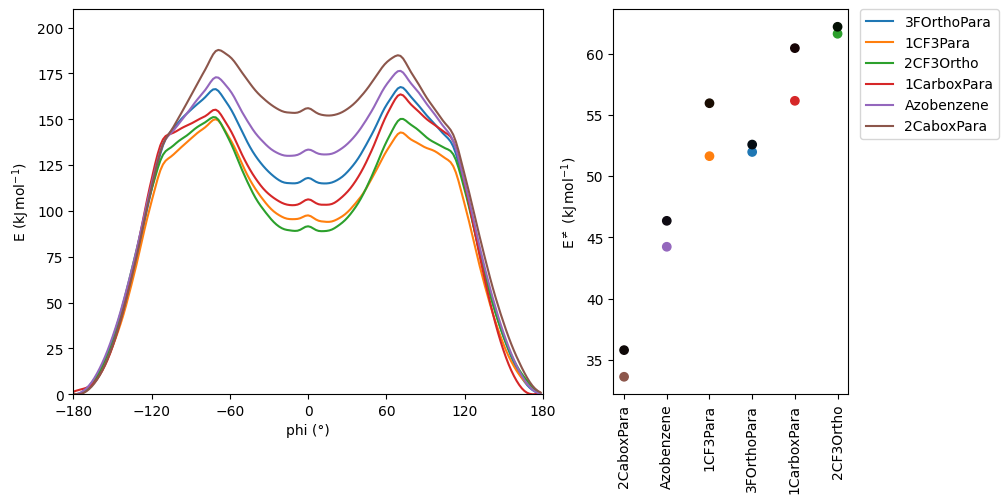

In [264]:
filePaths = glob.glob("Plumed/Other/*")

fig, ax= plt.subplots(1,2, width_ratios=[2, 1])
fig.set_size_inches(10, 5)
ax1, ax2 = ax
ax1.set_xlim(-180, 180)
ax1.set_ylim(0, 210)
ax1.set_xticks([x for x in range(-180, 181, 60)])
tsEnergys = [] 
artists = []
for filePath in filePaths:
    phi, energy, error = openHills(filePath)
    art, = ax1.plot(phi, energy, label = filePath.split("/")[-1].removesuffix(".dat"))
    maxEnergys = energy[np.array(argrelextrema(energy, np.greater)[0])]
    MAX = maxEnergys[maxEnergys >= maxEnergys[maxEnergys>50].mean()].mean()

    minEnergys = energy[np.array(argrelextrema(energy, np.less)[0])]
    MIN = minEnergys[minEnergys >= minEnergys[minEnergys>50].mean() * 0.95].mean()

    tsEnergys.append([filePath.split("/")[-1].removesuffix(".dat"), MAX-MIN, art.get_color()])

    get_rgb= lambda x: list([int(x[i:i+2], 16) for i in (0, 2, 4)])
    new_lst= np.array(np.array(list((map(get_rgb, [art.get_color()[1:]])))[0], dtype=int) * 0.1, dtype=int)
    colHex = f"#{new_lst[0]:02x}{new_lst[1]:02x}{new_lst[2]:02x}"
    tsEnergys.append([filePath.split("/")[-1].removesuffix(".dat"), energy.max()-energy[50:130].min(), colHex])

    artists.append(art)
ax1.set_xlabel(r"phi (°)")
ax1.set_ylabel(r"E ($\text{kJ}\,\text{mol}^{-1}$)");


tsEnergys.sort(key=lambda x: x[1])
labels, energys, color = np.array(tsEnergys).T
energys = np.array(energys, dtype=float)
ax2.scatter(labels, energys, c = color)
ax2.set_ylabel(r"E$^{\neq}$ ($\text{kJ}\,\text{mol}^{-1}$)")
plt.legend(artists, [x.get_label() for x in artists], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90);
fig.savefig("OtherCompunds.png", bbox_inches="tight")

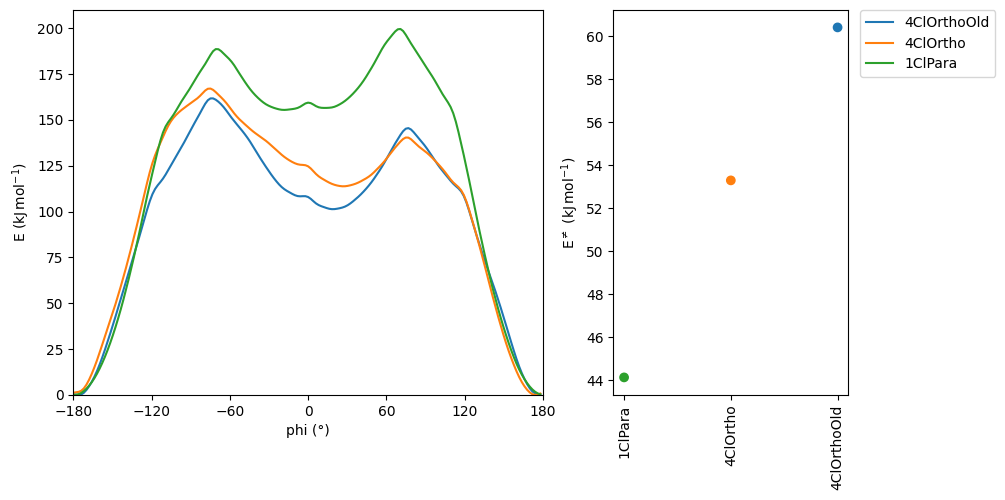

In [6]:
filePaths = glob.glob("Plumed/Bad/*")

fig, ax= plt.subplots(1,2, width_ratios=[2, 1])
fig.set_size_inches(10, 5)
ax1, ax2 = ax
ax1.set_xlim(-180, 180)
ax1.set_ylim(0, 210)
ax1.set_xticks([x for x in range(-180, 181, 60)])
tsEnergys = [] 
artists = []
for filePath in filePaths:
    phi, energy, error = openHills(filePath)
    art, = ax1.plot(phi, energy, label = filePath.split("/")[-1].removesuffix(".dat"))
    tsEnergys.append([filePath.split("/")[-1].removesuffix(".dat"), energy.max()-energy[50:130].min(), art.get_color()])
    artists.append(art)
ax1.set_xlabel(r"phi (°)")
ax1.set_ylabel(r"E ($\text{kJ}\,\text{mol}^{-1}$)");


tsEnergys.sort(key=lambda x: x[1])
labels, energys, color = np.array(tsEnergys).T
energys = np.array(energys, dtype=float)
ax2.scatter(labels, energys, c = color)
ax2.set_ylabel(r"E$^{\neq}$ ($\text{kJ}\,\text{mol}^{-1}$)")
plt.legend(artists, [x.get_label() for x in artists], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90);
fig.savefig("OtherCompunds.png", bbox_inches="tight")

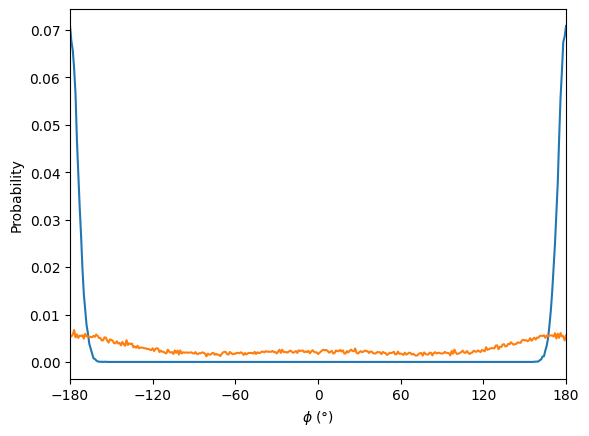

In [7]:
arr = np.genfromtxt("AngleDistributions/F1paraNoPotential.xvg", dtype=float).T
arr2 = np.genfromtxt("AngleDistributions/F1paraWithPotential.xvg", dtype=float).T
fig, ax = plt.subplots()
ax.set_xticks([x for x in range(-180, 181, 60)])
ax.set_xlim(-180, 180)
ax.plot(arr[0], arr[1])
ax.plot(arr2[0], arr2[1])
ax.set_xlabel(r"$\phi$ (°)");
ax.set_ylabel(r"Probability");
fig.savefig("AngleDistributions.png", bbox_inches="tight")

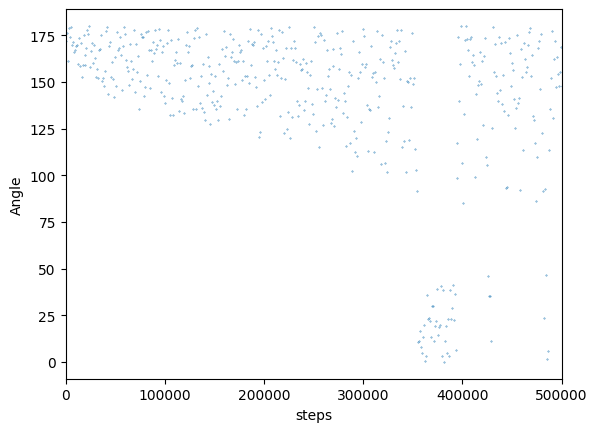

In [8]:
arr = np.genfromtxt("AngleOverTime/F1ParaOvertimePlumed.xvg", dtype=float).T
fig, ax = plt.subplots()
# ax.set_xticks([x for x in range(-180, 181, 60)])
ax.set_xlim(0, 500000)
ax.scatter(arr[0]*500, np.abs(arr[1]), s = 0.1)
ax.set_xlabel(r"steps");
ax.set_ylabel(r"Angle");
fig.savefig("AngleOverTime.png", bbox_inches="tight")